In [ ]:
## CatBoost
## Predict proba ensemble

In [ ]:
## Multi Column apply (axis = 1)

# df['Sex'] = df[['Sex','Name']].apply(lambda x: 'Child' if x['Name'].split(' ')[1] == 'Master.' else x['Sex'], axis=1)

In [ ]:
## Multi-İndex Slicing

# df.groupby(['Survived','Cabin'])[['PassengerId']].count().loc[(slice(None),'E12'), ['PassengerId']]
# df.groupby(['Survived','Cabin'])[['PassengerId']].count()[df.groupby(['Survived','Cabin'])[['PassengerId']].count()['PassengerId'] == 2].loc[(1,slice(None))]

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')
_df = pd.read_csv('test.csv')

In [4]:
## Parch - SibSp Alive-Rate

df = df.merge(
    pd.DataFrame(df.groupby(['Parch','SibSp'])['Survived'].mean()). \
    rename(columns={'Survived':'Alive-Rate'}).reset_index()
    ,on=['Parch','SibSp'])

In [7]:
_df['Surname'] = _df['Name'].apply(lambda x: x.split(',')[0])
df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0])
df = pd.merge(df,_df['Surname'])

In [8]:
_df['Title'] = _df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].replace(' ',''))
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].replace(' ',''))

# _df['Title'] = _df['Title'].replace('Col','Mr')
# _df['Title'] = _df['Title'].replace('Rev','Mr')
# _df['Title'] = _df['Title'].replace('Dr','Mr')
# _df['Title'] = _df['Title'].replace('Dona','Mrs')
# _df['Title'] = _df['Title'].replace('Miss','Mrs')
# _df['Title'] = _df['Title'].replace('Ms','Mrs')

# df['Title'] = df['Title'].replace('Dr','Mr')
# df['Title'] = df['Title'].replace('Capt','Mr')
# df['Title'] = df['Title'].replace('Dr','Mr')
# df['Title'] = df['Title'].replace('Miss','Mrs')
# df['Title'] = df['Title'].replace('Miss','Mrs')

# df['Title'] = df['Title'].apply(lambda x: 'erkek' if x == 'Mr' else ('kadın' if x == 'Mrs' else 'Others'))

In [9]:
df.Title.unique()

array(['Mrs', 'Miss', 'Mr', 'Dr', 'Master', 'Capt'], dtype=object)

In [10]:
# _list = ['Master','Mr','Mrs']
# df_pivot = df.pivot_table('Survived', index='Surname',columns='Title')
# for i in _list: 
#     df_pivot[i] = df.pivot_table('Survived', index='Surname',columns='Title')[i].apply(lambda x: 0 if x != 1 else 1)

# df_pivot = df_pivot.reset_index()
# _df = pd.merge(_df, df_pivot, on='Surname',how='outer')
# _df = _df.sort_values('PassengerId')

In [11]:
df['Embarked'] = df['Embarked'].fillna('S')
_df['Embarked'] = _df['Embarked'].fillna('S')

Embarked Rate

In [12]:
_list = ['female','male']
__list = ['C','Q','S']
for i in _list:
    for j in range(3):
        index = df[df['Sex'] == i][df['Embarked'] == __list[j]].index
        _index = _df[_df['Sex'] == i][_df['Embarked'] == __list[j]].index
        value = df.pivot_table('Survived',index='Embarked',columns='Sex')[i][j]
        df.loc[index,'Embarked_rate'] = round(value,1)
        _df.loc[_index,'Embarked_rate'] = round(value,1)

Pclass Rate

In [13]:
df.pivot_table('Survived',index='Pclass',columns='Sex')

_list = ['female','male']
for i in _list:
    for j in range(3):
        index = df[df['Sex'] == i][df['Pclass'] == (j+1)].index
        _index = _df[_df['Sex'] == i][_df['Pclass'] == (j+1)].index
        value = df.pivot_table('Survived',index='Pclass',columns='Sex')[i][j+1]
        df.loc[index,'Pclass_rate'] = round(value,1)
        _df.loc[_index,'Pclass_rate'] = round(value,1)

Fill nan Age values

In [14]:
def fillAge(df): ## title
    start = df.groupby(['Sex','Pclass'])[['Age']].agg(lambda x: x.mean() + x.std()) ##.unstack()
    end = df.groupby(['Sex','Pclass'])[['Age']].agg(lambda x: x.mean() - x.std()) ##.unstack()

    _list = ['female','male']
    for i in _list:
        for j in range(3):
            x = start.loc[i].iloc[j].values[0]
            y = end.loc[i].iloc[j].values[0]
            length = len(df[df['Sex'] == i][df['Pclass'] == (j+1)][np.isnan(df['Age'])]) 
            index = df[df['Sex'] == i][df['Pclass'] == (j+1)][df['Age'].isna()].index
            random_values = np.random.randint(y,x,length)
            df['Age'].loc[index] = random_values

    df['Age'] = df['Age'].astype(int)

fillAge(df)
fillAge(_df)    

Categorical Age

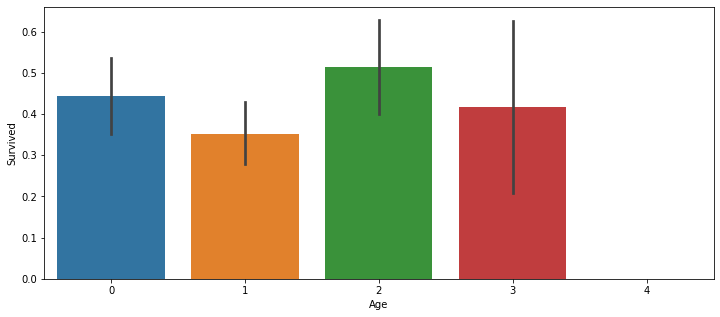

In [15]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

_df.loc[ _df['Age'] <= 16, 'Age'] = 0
_df.loc[(_df['Age'] > 16) & (_df['Age'] <= 32), 'Age'] = 1
_df.loc[(_df['Age'] > 32) & (_df['Age'] <= 48), 'Age'] = 2
_df.loc[(_df['Age'] > 48) & (_df['Age'] <= 64), 'Age'] = 3
_df.loc[ _df['Age'] > 64, 'Age'] = 4

fig = plt.figure(figsize=(12,5))
sns.barplot(x='Age', y='Survived', data=df)
plt.show()

Categorical Fare

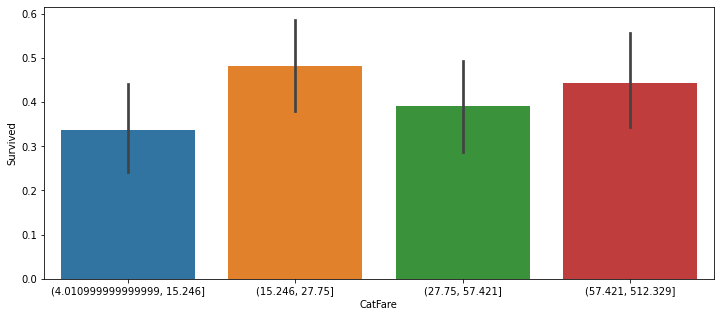

In [16]:
df['CatFare'] = pd.qcut(df['Fare'],4)
_df['CatFare'] = pd.qcut(_df['Fare'],4)

fig = plt.figure(figsize=(12,5))
sns.barplot(x='CatFare', y='Survived', data=df)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['CatFare'] = label.fit_transform(df['CatFare'])
_df['CatFare'] = label.fit_transform(_df['CatFare'])

Categorical Sex and Embarked

In [18]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0}).astype('int')
_df['Sex'] = _df['Sex'].map({'female':1, 'male':0}).astype('int')

df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')
_df['Embarked'] = _df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype('int')

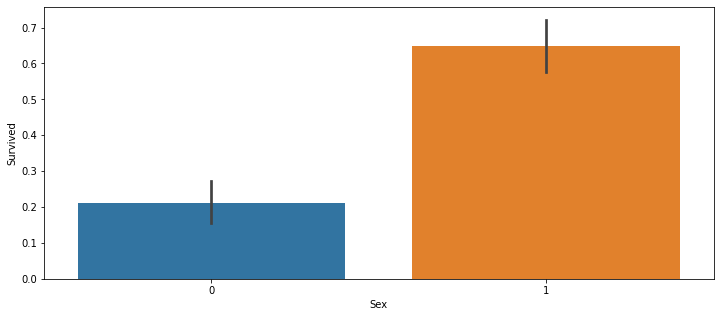

In [19]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

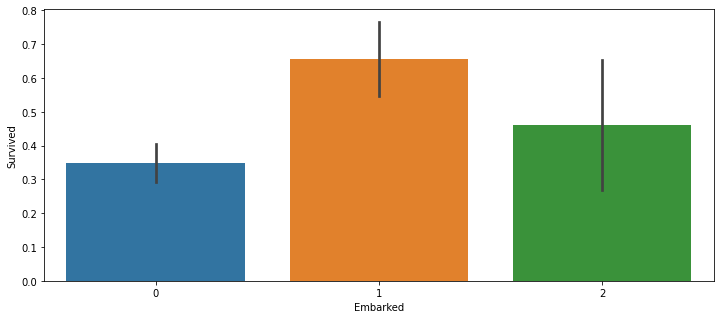

In [20]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()

is Alone?

In [21]:
df['Alone'] = df['SibSp'] + df['Parch']
df['Alone'] = df['Alone'].apply(lambda x: 1 if x != 0 else 0)

_df['Alone'] = _df['SibSp'] + _df['Parch']
_df['Alone'] = _df['Alone'].apply(lambda x: 1 if x != 0 else 0)

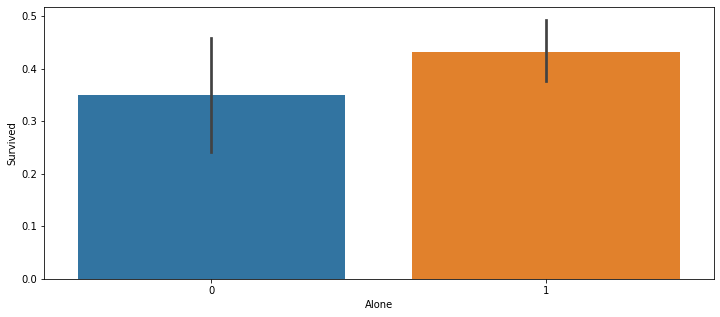

In [22]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='Alone', y='Survived', data=df)
plt.show()

Family Size

In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch'] ## 2 gruba böl
_df['FamilySize'] = _df['SibSp'] + _df['Parch']

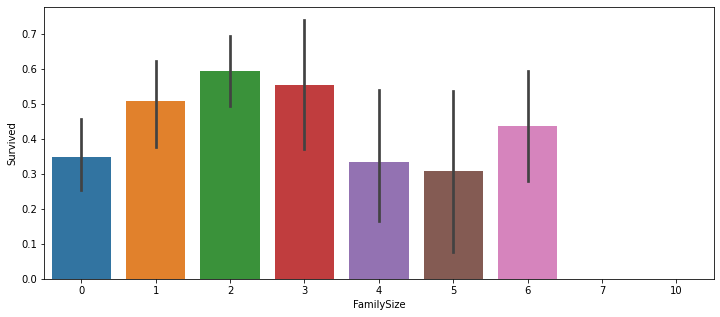

In [24]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.show()

is Cabin?

In [25]:
df['isCabin'] = df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
_df['isCabin'] = _df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

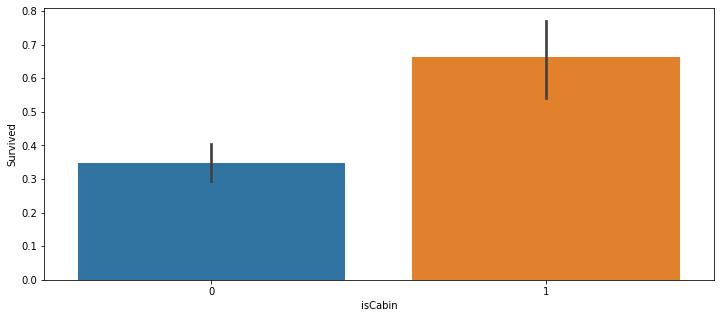

In [26]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='isCabin', y='Survived', data=df)
plt.show()

Title

In [27]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].replace(' ',''))
_df['Title'] = _df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].replace(' ',''))

In [28]:
_list = ['Mr', 'Mrs', 'Master']
df['Title'].replace(['Lady', 'Miss', 'Ms', 'Mlle', 'Mme'], 'Mrs', inplace=True)
df['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
df['Title'][~df.Title.isin(_list)] = 'Others'

_df['Title'].replace(['Lady', 'Miss', 'Ms', 'Mlle', 'Mme'], 'Mrs', inplace=True)
_df['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
_df['Title'][~_df.Title.isin(_list)] = 'Others'

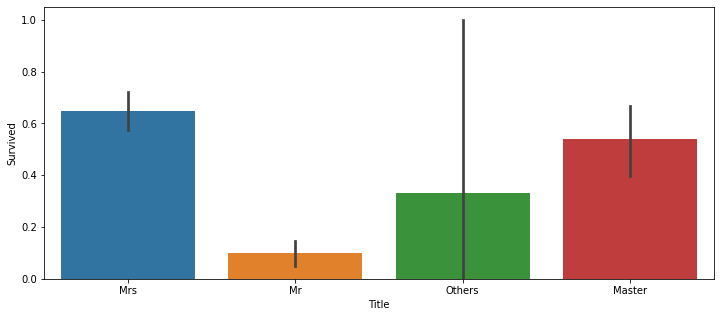

In [29]:
fig = plt.figure(figsize=(12,5))
sns.barplot(x='Title', y='Survived', data=df)
plt.show()

In [30]:
df.drop(['Name'],axis=1,inplace=True)
_df.drop(['Name'],axis=1,inplace=True)

Categorical Title

In [31]:
df['Title'].unique()

array(['Mrs', 'Mr', 'Others', 'Master'], dtype=object)

In [32]:
df['Title'] = df['Title'].map({'Mr':0, 'Mrs':1,'Master':2,'Others':3}).astype('int')
_df['Title'] = _df['Title'].map({'Mr':0, 'Mrs':1,'Master':2,'Others':3}).astype('int')

Drop columns

In [33]:
df.drop(['Parch','SibSp','Cabin','Fare','PassengerId','Ticket','Surname'], axis=1,inplace=True)
_df.drop(['Parch','SibSp','Cabin','Fare','PassengerId','Ticket','Surname'], axis=1,inplace=True)

Model

In [34]:
y = df['Survived']
x = df.drop(['Survived'],axis=1)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

/home/madao/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/skle

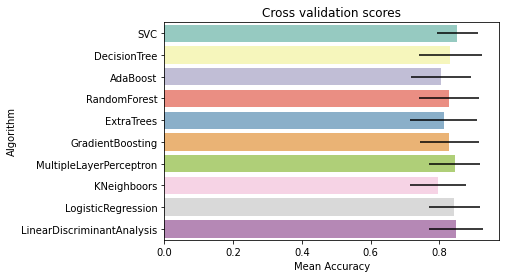

In [37]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 55
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [38]:
classifier_list = ['SVC','DecisionTreeClassifier', 'Adaboost', 'RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier','MLP','KNeighborsClassifier','LogisticRegression','LinearDiscriminantAnalysis']

_dict = {}
for i,j in zip(cv_means, classifier_list):
    _dict[j] = i

import operator

sorted(_dict.items(), key=operator.itemgetter(1))[::-1]

[('SVC', 0.8523076923076923),
 ('LinearDiscriminantAnalysis', 0.8486153846153848),
 ('MLP', 0.8446153846153847),
 ('LogisticRegression', 0.8443076923076923),
 ('DecisionTreeClassifier', 0.8326153846153848),
 ('GradientBoostingClassifier', 0.8287692307692309),
 ('RandomForestClassifier', 0.8287692307692307),
 ('ExtraTreesClassifier', 0.8127692307692309),
 ('Adaboost', 0.8047692307692309),
 ('KNeighborsClassifier', 0.7967692307692308)]

In [39]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(x_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


0.8367692307692309

In [40]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(x_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8406153846153845

In [41]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(x_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8524615384615386

In [42]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(x_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name '

0.7250769230769231

In [43]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(x_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8643076923076924

/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name '

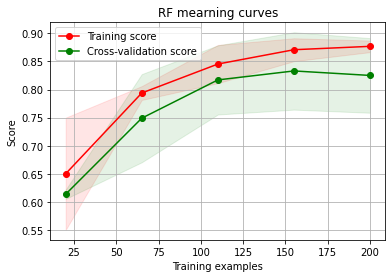

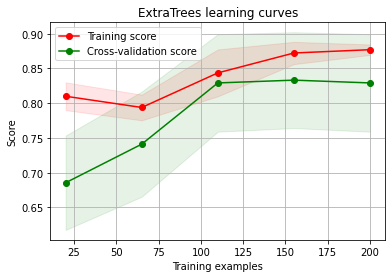

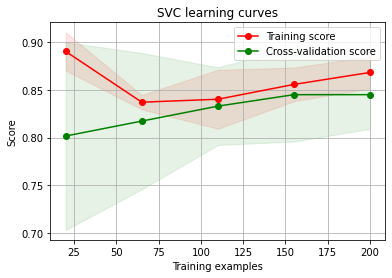

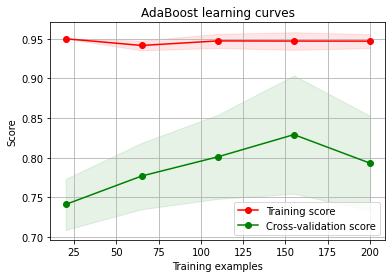

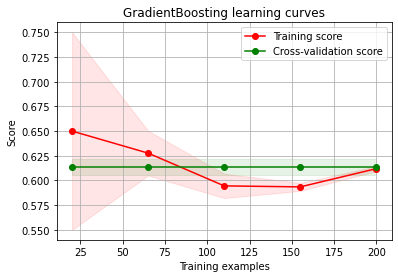

In [44]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",x_train,y_train,cv=5)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",x_train,y_train,cv=5)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",x_train,y_train,cv=5)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",x_train,y_train,cv=5)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",x_train,y_train,cv=5)

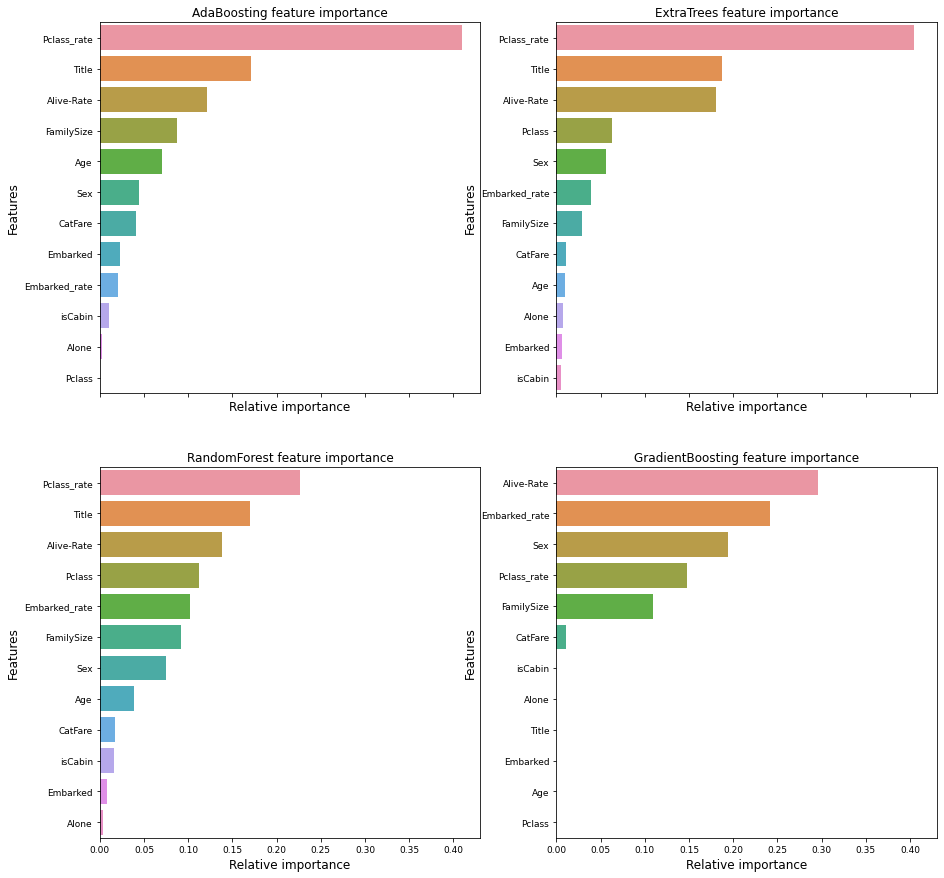

In [45]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=x_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

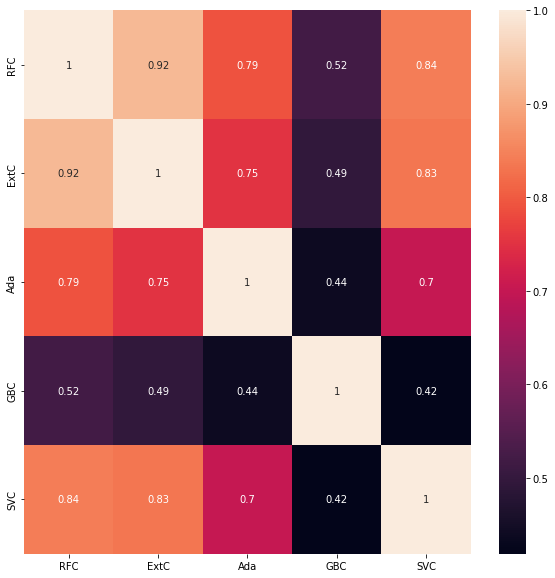

In [46]:
test_Survived_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(x_test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(x_test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(x_test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)

plt.figure(figsize=(10,10))
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [47]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(x_train, y_train)

/home/madao/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [48]:
df_submit = pd.read_csv('gender_submission.csv')

In [ ]:
submit = pd.DataFrame({'PassengerId': df_submit.PassengerId, 'Survived': votingC.predict(_df)})
submit.to_csv('submission.csv',index=False)

pd.read_csv('submission.csv')